In [1]:
import numpy as np
from scipy.constants import *
from pySLM import *
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import shift
%matplotlib  inline

In [2]:
from scipy.fftpack import fft2, fftshift

In [3]:
plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams['font.size'] = 20

In [4]:
input_profile = np.load("cylindrical.npy")
input_profile = np.sqrt(np.abs(input_profile))*input_profile/np.abs(input_profile)

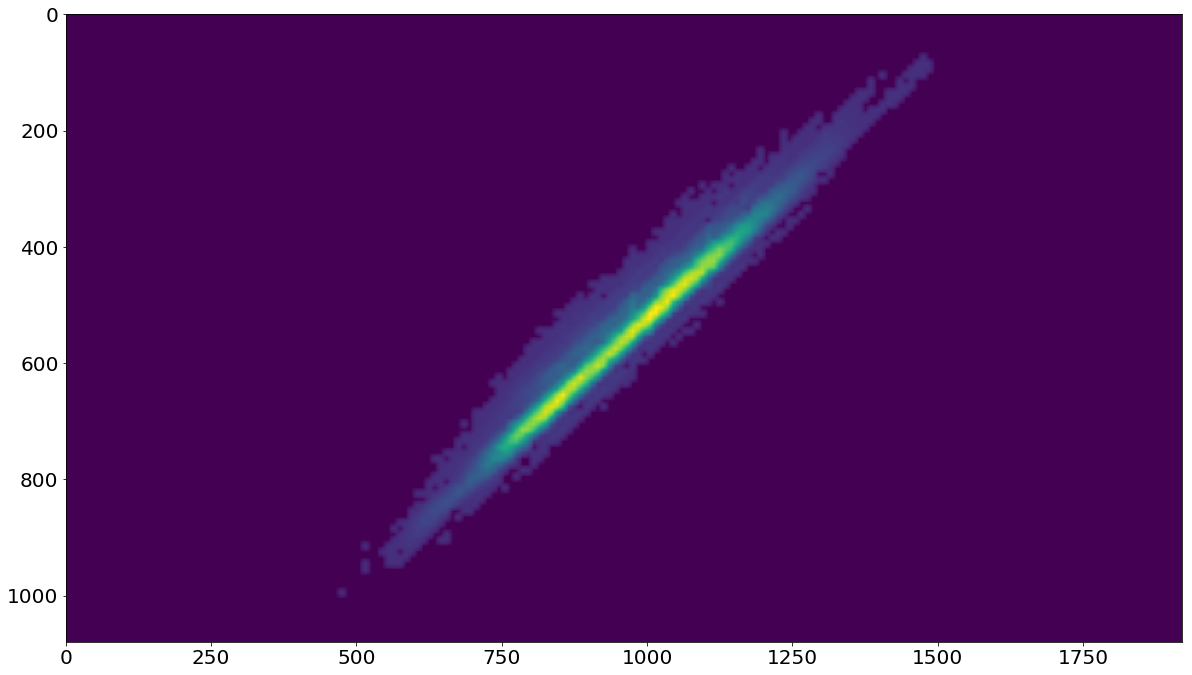

In [103]:
plt.imshow(np.abs(input_profile))

In [6]:
p=2
dmd = DLP9500(wavelength=369*nano, focal_length=200*milli, periodicity=p, theta=-pi/4, negative_order=True)
sim = DMDSimulation(dmd, padding=0)


In [7]:
xc, yc = sim.first_order_origin

In [216]:
output_profile = ElipicalGaussianTEM(0,0,1,6e-5,6e-6)+ ElipicalGaussianTEM(0,5e-5,1,6e-5,6e-6)+ ElipicalGaussianTEM(0,-1e-4,1,6e-5,6e-6)
output_profile = output_profile*PhaseGradient(200/(10*milli), 200/(10*milli))
output_profile = output_profile.rotate(np.pi/4)

In [217]:
#signal_window = ElipicalGaussianTEM(0,0,1,4e-6,4e-5).rotate(np.pi/4)
#signal_window = signal_window.translate(-xc, -yc)
#signal_window = signal_window(*dmd.image_plane_grid)
#signal_window = signal_window > 1e-30

In [218]:
signal_window = RectWindow(0,0,800*micro,30*micro).rotate(-np.pi/4).translate(-xc,-yc)
signal_window = signal_window(*dmd.image_plane_grid)

In [219]:
dmd.calculate_dmd_state(input_profile, output_profile, binarize=True,binarize_method="IFTA", 
                        signal_window=signal_window,N=3000, full_field=True)

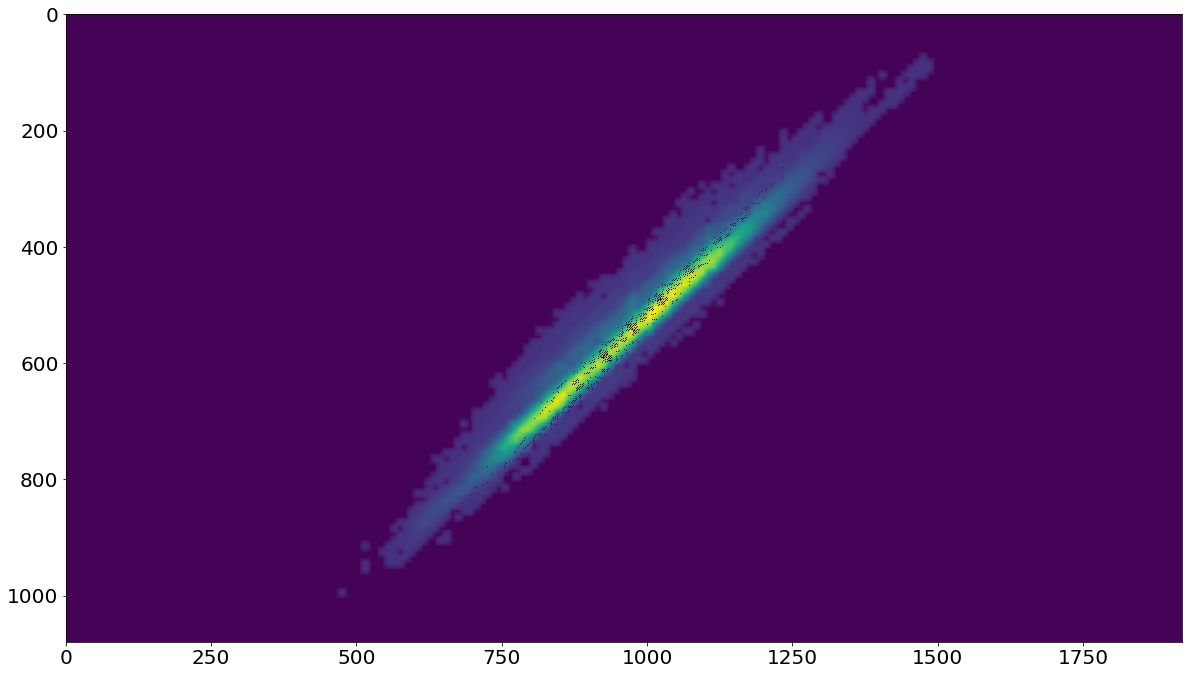

In [220]:
plt.imshow(~dmd.dmd_state*np.abs(input_profile))

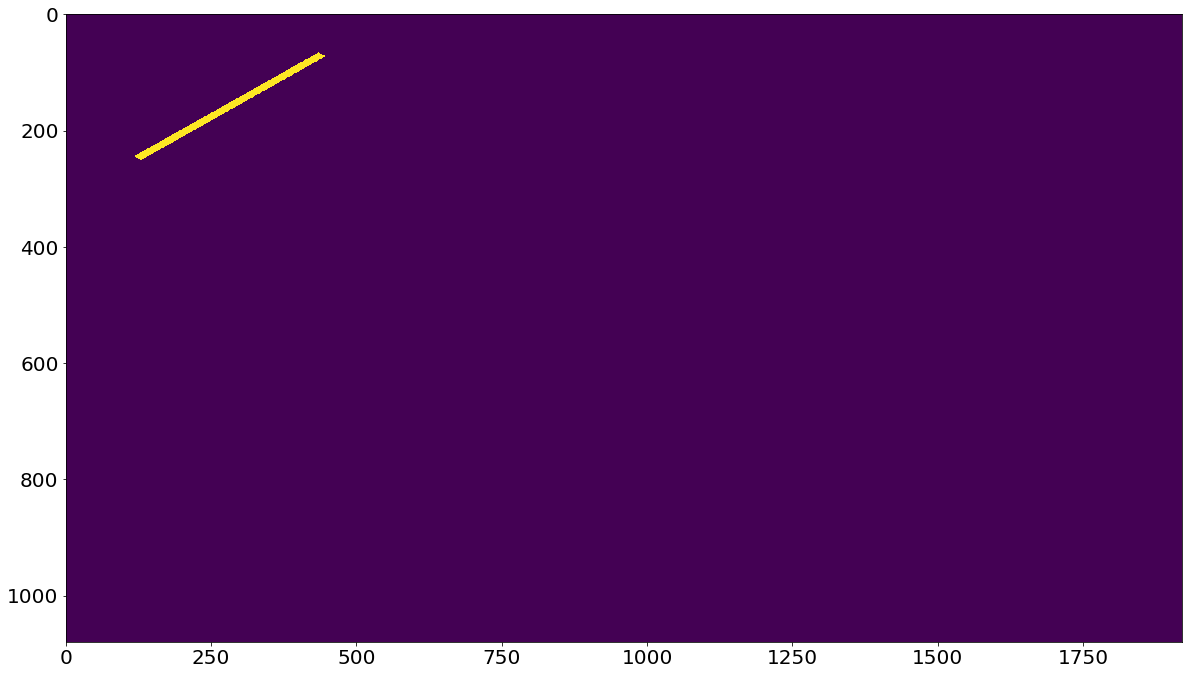

In [221]:
plt.imshow(signal_window)

In [222]:
np.sum(signal_window)

4270

In [223]:
sim.propagate_to_image(input_profile)
sim.block_zeroth_order()

In [224]:
amp = np.abs(sim.image_plane_field)
amp = amp/np.max(amp)
amp_db = 10*np.log10(amp)

/home/gilbert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gilbert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gilbert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


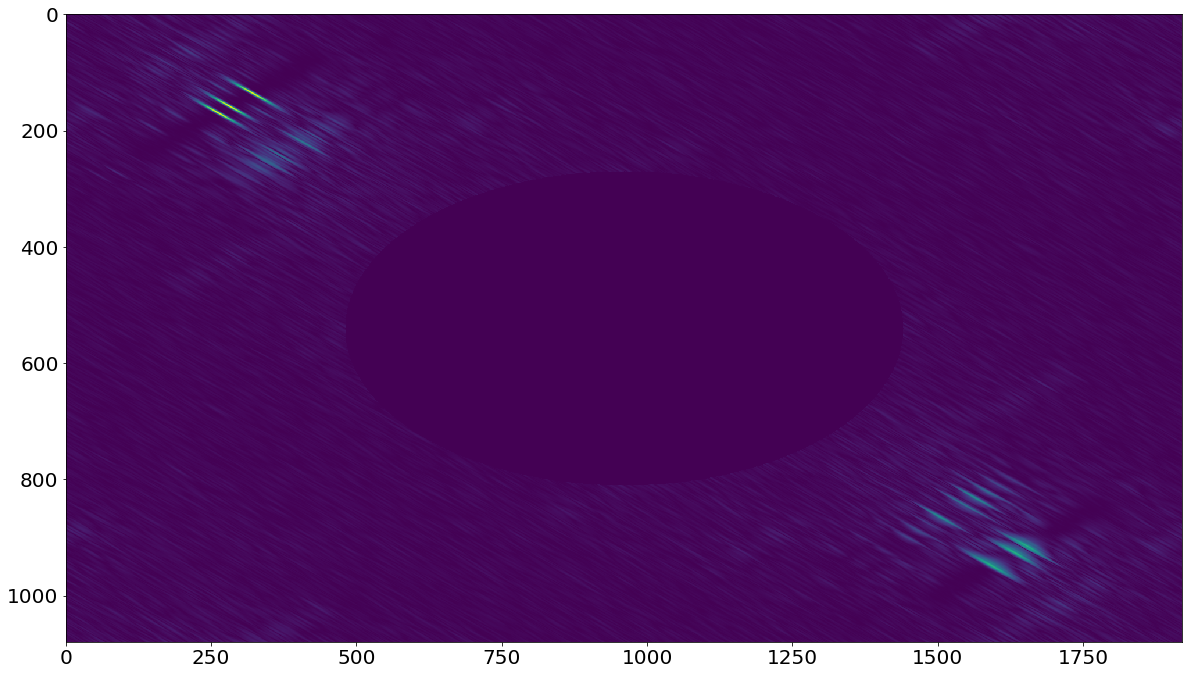

In [225]:
plt.imshow(amp)

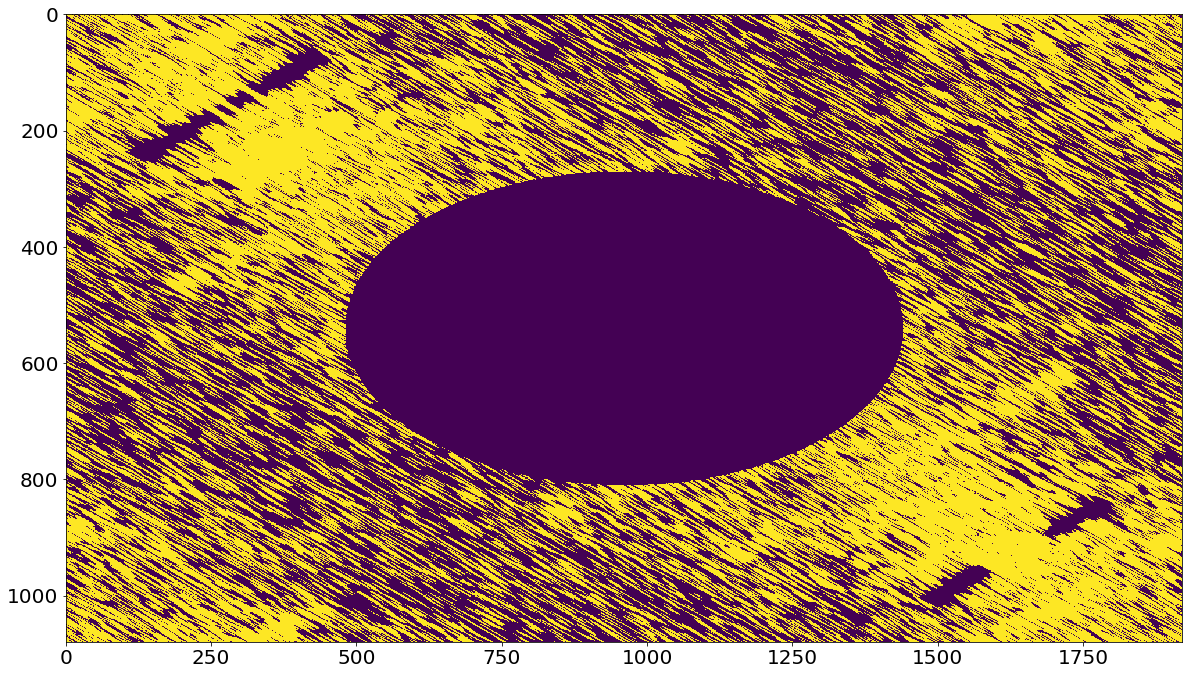

In [226]:
plt.imshow(amp_db>-18)

/home/gilbert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.
/home/gilbert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


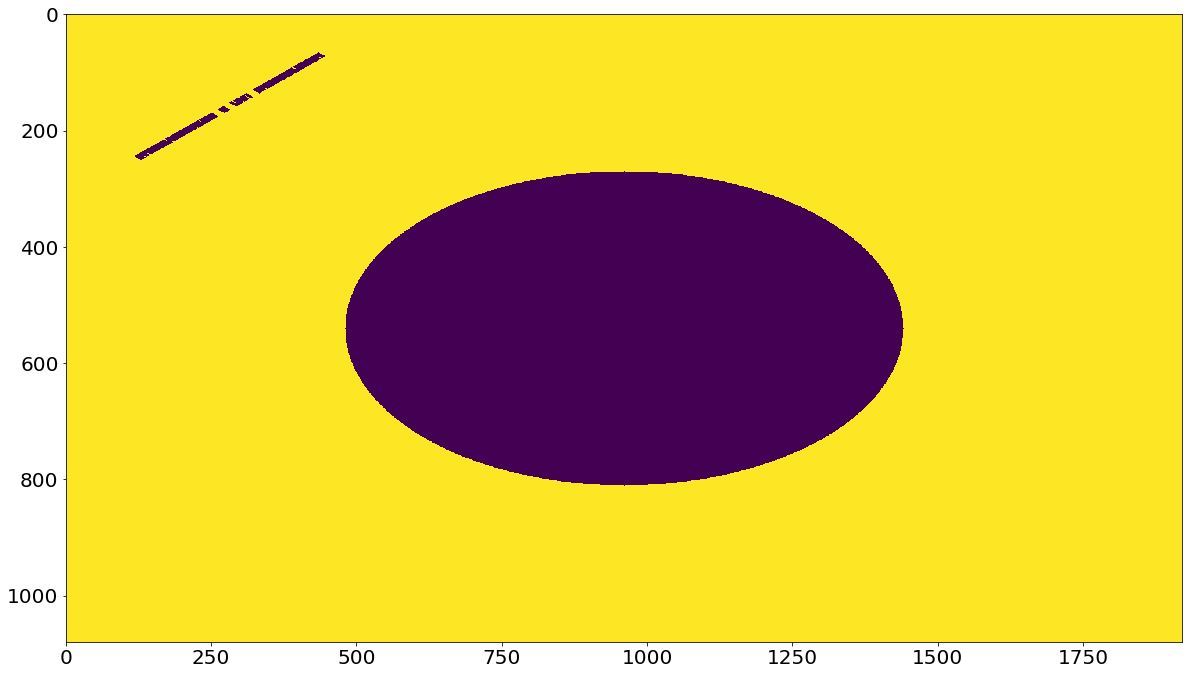

In [229]:
plt.imshow(signal_window*amp_db>-20)